In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rm_path = "ckpts/rm2_atmoic_facts_llama7B/checkpoint_10000/hf_model/"
rm_gpt3pt5_path = "ckpts/rm2_atmoic_facts_gpt3pt5_llama7B/checkpoint_10000/hf_model/"
rm_50_50_path = "ckpts/rm_atmoic_facts_llama7B_50_50/checkpoint_10000/hf_model/"


In [59]:
# true_eval_points_perplexitites = np.load(rm_50_50_path + "test_medium_True_facts_label_perplexity.npy")
# false_eval_points_perplexitites = np.load(rm_50_50_path + "test_medium_False_facts_label_perplexity.npy")
# sample_eval_points_perplexitites = np.load(rm_50_50_path + "test_medium_samples_label_perplexity.npy")


In [3]:
rm_false_preds = np.load(rm_path + "test_medium_False_facts_preds.npy")
rm_true_preds = np.load(rm_path + "test_medium_True_facts_preds.npy")
rm_samples_preds = np.load(rm_path + "test_medium_samples_preds.npy")

rm_gpt3pt5_false_preds = np.load(rm_gpt3pt5_path + "test_medium_False_facts_preds.npy")
rm_gpt3pt5_true_preds = np.load(rm_gpt3pt5_path + "test_medium_True_facts_preds.npy")
rm_gpt3pt5_samples_preds = np.load(rm_gpt3pt5_path + "test_medium_samples_preds.npy")

In [6]:
import json
with open("ckpts/sft_bios_new_llama7B/checkpoint_20000/hf_model/factscores_test_medium.json", "r") as f:
    factscores = json.load(f)

num_entities  = np.load("num_pretrain_entities/bios_test_points_medium.npy")

decisions = factscores["decisions"]

lines_all = []
correct_all = []
num_entities_all = []
for i, decision in enumerate(decisions):
    if decision is not None:
        for atomic_fact in decision:
            lines_all.append(atomic_fact["atom"])
            correct_all.append(atomic_fact["is_supported"])
            num_entities_all.append(num_entities[i])
lines_all = np.array(lines_all)
correct_all = np.array(correct_all)
num_entities_all = np.array(num_entities_all)
true_samples = np.where(correct_all == True)[0]
false_samples = np.where(correct_all == False)[0]

In [5]:

def get_percent_True_preds(perplexity_bins, preds, perplexities):
    percent_True_preds = []
    is_true_pred = preds==" Yes."
    for i in range(1, len(perplexity_bins)):
        percent_True_preds.append(np.mean(is_true_pred[np.logical_and(perplexity_bins[i-1] <= perplexities, perplexities < perplexity_bins[i])]))
    return percent_True_preds

def get_percent_False_preds(perplexity_bins, preds, perplexities):
    percent_False_preds = []
    preds = preds==" No."
    for i in range(1, len(perplexity_bins)):
        percent_False_preds.append(np.mean(preds[np.logical_and(perplexity_bins[i-1] <= perplexities, perplexities < perplexity_bins[i])]))
    return percent_False_preds

In [37]:
# perplexity_bins = np.percentile(false_eval_points_perplexitites, np.linspace(0, 100, 11))

In [74]:
# perplexity_bins = [0,  1.2, 1.3, 1.4, 1.5, 1.6, np.inf]

In [10]:
plt.plot(np.arange(0, len(perplexity_bins)-1), get_percent_True_preds(perplexity_bins, rm_true_preds, true_eval_points_perplexitites), "o-", label="RM")
# plt.plot(np.arange(0, len(perplexity_bins)-1), get_percent_True_preds(perplexity_bins, rm_gpt3pt5_true_preds, true_eval_points_perplexitites), "o-",label="RM GPT3.5")

plt.plot(np.arange(0, len(perplexity_bins)-1), get_percent_True_preds(perplexity_bins, rm_false_preds, false_eval_points_perplexitites), "o-", label="RM")

plt.legend()

plt.ylim(0, 1)


NameError: name 'true_eval_points_perplexitites' is not defined

(0.0, 1.0)

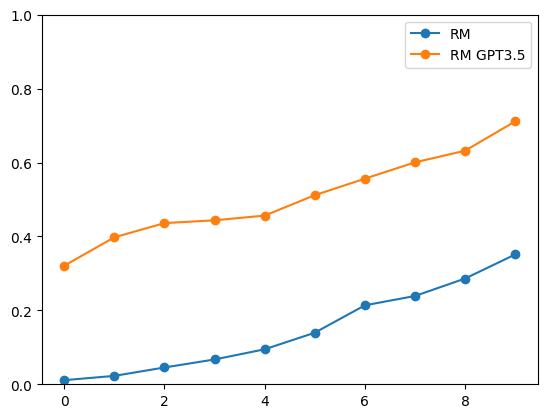

In [39]:
plt.plot(np.arange(0, len(perplexity_bins)-1), get_percent_True_preds(perplexity_bins, rm_false_preds, false_eval_points_perplexitites), "o-", label="RM")
plt.plot(np.arange(0, len(perplexity_bins)-1), get_percent_True_preds(perplexity_bins, rm_gpt3pt5_false_preds, false_eval_points_perplexitites), "o-",label="RM GPT3.5")
plt.legend()

plt.ylim(0, 1)

(0.0, 1.0)

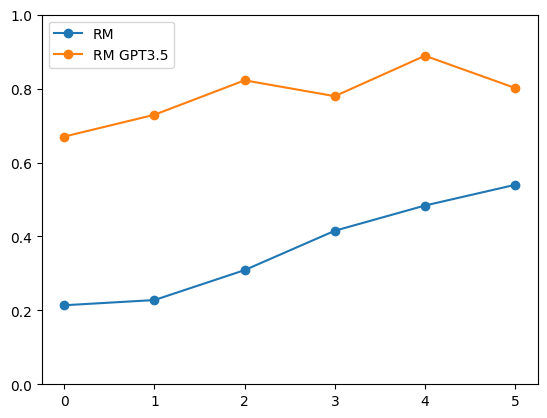

In [9]:
sample_eval_points_perplexitites = num_entities_all
perplexity_bins = np.percentile(sample_eval_points_perplexitites, [0, 75, 80, 85, 90, 95,100])


# plt.plot(np.arange(0, len(perplexity_bins)-1), get_percent_True_preds(perplexity_bins, rm_samples_preds[true_samples], sample_eval_points_perplexitites[true_samples]), "o-", label="RM")
# plt.plot(np.arange(0, len(perplexity_bins)-1), get_percent_True_preds(perplexity_bins, rm_gpt3pt5_samples_preds[true_samples], sample_eval_points_perplexitites[true_samples]), "o-",label="RM GPT3.5")
plt.plot(np.arange(0, len(perplexity_bins)-1), get_percent_True_preds(perplexity_bins, rm_samples_preds[false_samples], sample_eval_points_perplexitites[false_samples]), "o-", label="RM")
plt.plot(np.arange(0, len(perplexity_bins)-1), get_percent_True_preds(perplexity_bins, rm_gpt3pt5_samples_preds[false_samples], sample_eval_points_perplexitites[false_samples]), "o-",label="RM GPT3.5")

plt.legend()

plt.ylim(0, 1)

(0.0, 1.0)

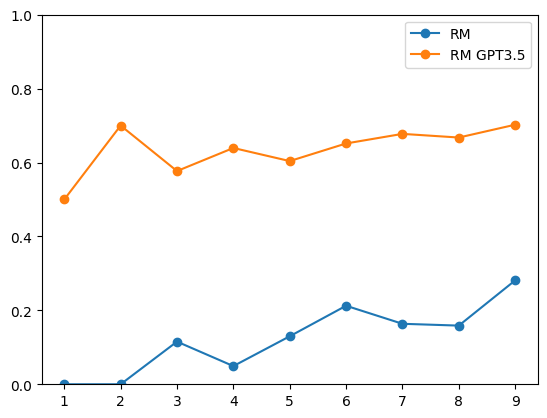

In [70]:
plt.plot(np.arange(0, len(perplexity_bins)-1), get_percent_True_preds(perplexity_bins, rm_samples_preds[false_samples], sample_eval_points_perplexitites[false_samples]), "o-", label="RM")
plt.plot(np.arange(0, len(perplexity_bins)-1), get_percent_True_preds(perplexity_bins, rm_gpt3pt5_samples_preds[false_samples], sample_eval_points_perplexitites[false_samples]), "o-",label="RM GPT3.5")
plt.legend()


plt.ylim(0, 1)

In [14]:
get_percent_False_preds(perplexity_bins, rm_false_preds, false_eval_points_perplexitites)

[0.9889006342494715,
 0.9772607086197779,
 0.9545454545454546,
 0.9328397673188789,
 0.9053410893707033,
 0.8604651162790697,
 0.7858276044420941,
 0.7605708245243129,
 0.713379164463247,
 0.6488630354309889]